# **Loan Default Prediction**

## ANURADHA RAJKUMAR

## **Executive Summary**

Throughout the globe, many individuals request loans from banks in order to finance their homes. This drives several economic decisions, and is interconnected with several institutions and domains.  Retail banks lend home loans and the interest they earn is a prominent portion of their profit, so selecting and approving the loan is a judicious process that requires hours of staff time, and careful analysis of credit score and other financial details. By leveraging machine learning, one can reduce banker time spent of qualifying and also removes any human selection bias. 

The goal of this project is to predict whether an induvidual will default on their home loans, and this can be treated as a supervised classification problem. The critical findings from Milestone 1 are that the XG Boost model works very well for this problem as it optimizes the recall rate ( which helps  one determine all those likely to default) while having a good precision and accuracy. The precision was 94% and recall was 84% and lastly, the accuracy was 93%. Four important features model chose as indicators of defaulting were: Delinquent Credit Lines and Derogatory reports that indicate late payments. It should be seen that the bankers do not issue lines of credit to induviduals under such cases. These were followed by Job - Self Employed and Number of Recent Credit Inquires. 

The main success of this model is that the banks will not lose money due to defaults. Due to its computational efficiency, the XG Boost model can reduce delays and bottlenecks which occur in the process of loan approvals. Since processing delays can cause more frustration in staff and clients, this solution will improve the overall work-flow of the loan approval process.

Using the provided dataset with existing customers, one can extract features that would be beneficial to determine whether a new customer will default on the loan. The  predictive model is explainable based on important features shown so that justifications can be provided in case of future disputes.

The next key steps are to improve the robustness of the model. It would be in the best interest of the institution to train the model will additonal data and also improve the balance of the dataset. The next process would be to develop data pipelining infrastructure, improvoing storage space and security and deploying a framework where the model can be used by bankers. The bank can consider using a pipeline with a Column Transformer is a common practice in machine learning




## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 
Throughout the globe, many individuals request loans from banks in order to finance their homes. This drives several economic decisions, and is interconnected with several institutions and domains.  Retail banks lend home loans and the interest they earn is a prominent portion of their profit, so selecting and approving the loan is a judicious process that requires hours of staff time, and careful analysis of credit score and other financial details.Furthermore, this can cause a bottleneck in the processing times of these loans in which the customer could be approaching competitor institutions.  

Deliquency is when a loan payment is missed and if a certain amount of time passes, the loan goes into default (NPA). The borrower is considered a defaulter if they stop making payments. Banks are fearful of defaulters as their profit depends on this. It is also crucial that these loan selection procesess minimize biases and incorrect judgement from human error. 

With the increase of computational and analytical tools, it is more efficient to build use machine learning and data science for these types of problems. With advanced computational capabilities, larger datasets can be analyzed and compared for a more thorough analysis. The analysis can also help banks determine lending conditions such as rating the risk of a borrower, adding additional loan terms/conditions, and prepare for possible losses. This saves time for staff and also removes any human selection bias. 

The goal is to building machine learning models  that can learn this approval process and make it free of biases and more efficient.

### **The objective:**

 The intended goal is to effectively detect defaulters (based on existing credit history) to increase profits for the bank ( or avoid losses). Using the provided dataset with existing customers, one can extract features that would be beneficial to determine whether a new customer will default on the loan. 
The  predictive model must be explainable so that justifications can be provided in case of future disputes. The goal is avoid human bias in the model.
 
### **The key questions:**

- What are the key questions that need to be answered?

What are best metric to analyse this data? Are we interested in improving recall, precision or the f1 score?
What are the datatypes ( features) present and how can they best explain defaulting?
What are the key features that play a role in detecting defaulters?

### **The problem formulation**:

The goal is to analyze the data provided to find which **factors have a high influence on defaulted customers, and building a predictive model that can predict which customer is going to be default in advance, and help in formulating profitable business for banks.**

Based on the problem formulation it can be seen that the recall rate is the most important metric. That is we want to minimze False negative rates. We want to correctly identify those who will default so that the bank can identify high risk clients before they give loans. 

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression 
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import make_scorer, f1_score, confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier


# import SVC classifier
from sklearn.svm import SVC




## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [190]:
# Read the loan dataset file
Loan_data = pd.read_csv("hmeq.csv")

# Copying data to another variable to avoid any changes to original data
data = Loan_data.copy()



In [191]:
# Looking at the first 5 records
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [8]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   int64  
 1   LOAN            5960 non-null   int64  
 2   MORTDUE         5960 non-null   float64
 3   VALUE           5960 non-null   float64
 4   YOJ             5960 non-null   float64
 5   DEROG           5960 non-null   float64
 6   DELINQ          5960 non-null   float64
 7   CLAGE           5960 non-null   float64
 8   NINQ            5960 non-null   float64
 9   CLNO            5960 non-null   float64
 10  REASON_HomeImp  5960 non-null   uint8  
 11  JOB_Office      5960 non-null   uint8  
 12  JOB_Other       5960 non-null   uint8  
 13  JOB_ProfExe     5960 non-null   uint8  
 14  JOB_Sales       5960 non-null   uint8  
 15  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(2), uint8(6)
memory usage: 500.7 KB



All these columns have missing values ( total shoud be 5960)
 - MORTDUE  5442 non-null   float64
 -  VALUE    5848 non-null   float64
 -    REASON   5708 non-null   object
 -    JOB      5681 non-null   object
 -  YOJ      5445 non-null   float64
 -  DEROG    5252 non-null   float64
 -   DELINQ   5380 non-null   float64
 -   CLAGE    5652 non-null   float64
 - NINQ     5450 non-null   float64
 -  CLNO     5738 non-null   float64
 -  DEBTINC  4693 non-null   float64

* The dataset has **5960 rows and 12 columns**. 

* `REASON`and `JOB`are of **object type** while the rest of the columns are numeric in nature.


In [10]:
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [192]:
data['BAD'].value_counts()
# 0 is good (repaid)
# 1 is bad ( dafault)


# it is evident that the data mostly contains 'good' data, note for later to create class weights 


0    4771
1    1189
Name: BAD, dtype: int64

In [193]:
data['JOB'].unique()
# different job roles in dataset

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [13]:
data['REASON'].unique()
# different reasons for loan in dataset

array(['HomeImp', nan, 'DebtCon'], dtype=object)

In [194]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [15]:
# List of all important categorical variables
cat_col = ["REASON", "JOB","BAD"]

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts("True"))
    print("-" * 50)

DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
--------------------------------------------------
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
--------------------------------------------------
0    0.800503
1    0.199497
Name: BAD, dtype: float64
--------------------------------------------------


**bold text**## Summary Statistics

- Observations from Summary Statistics

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions** (ANSWERS at the end of the section):
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


LOAN
Skew : 2.02


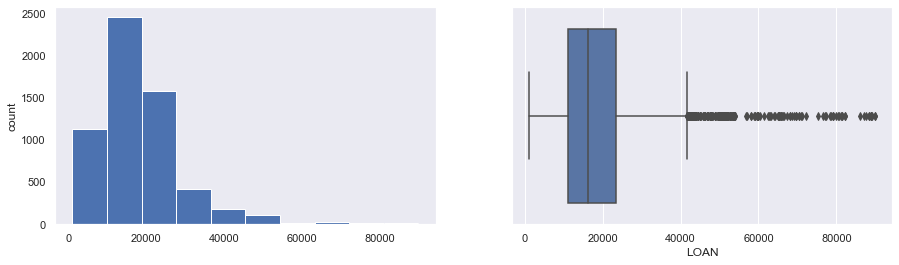

MORTDUE
Skew : 1.81


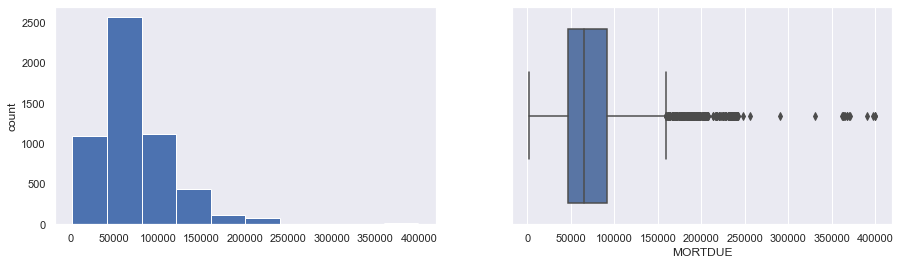

VALUE
Skew : 3.05


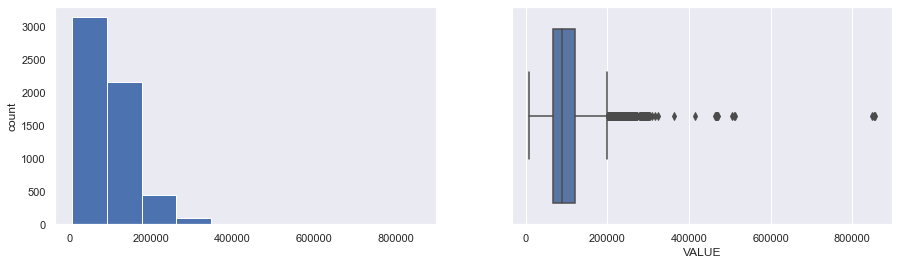

YOJ
Skew : 0.99


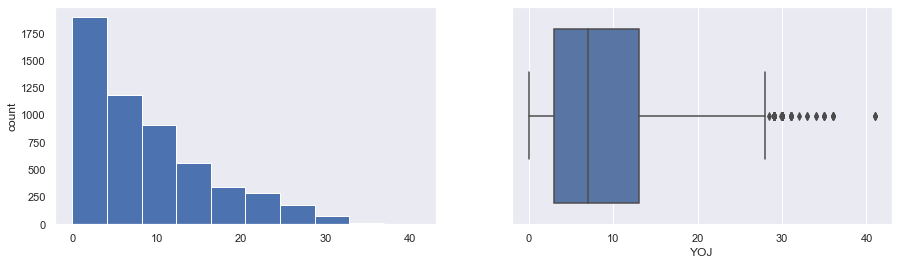

DEROG
Skew : 5.32


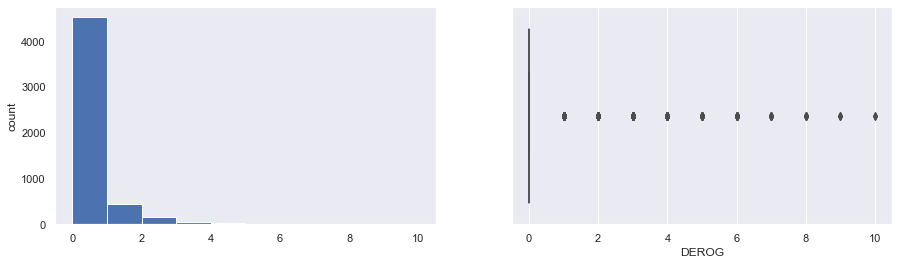

DELINQ
Skew : 4.02


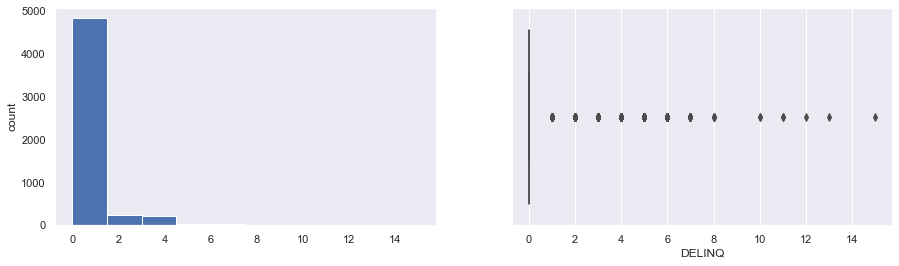

CLAGE
Skew : 1.34


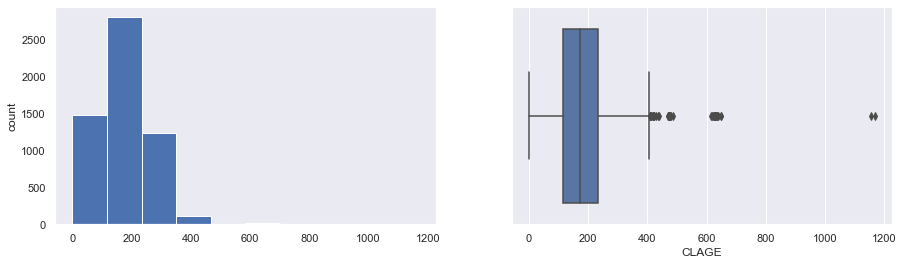

NINQ
Skew : 2.62


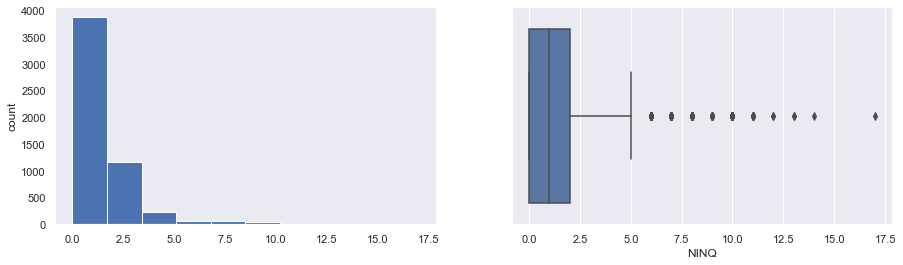

CLNO
Skew : 0.78


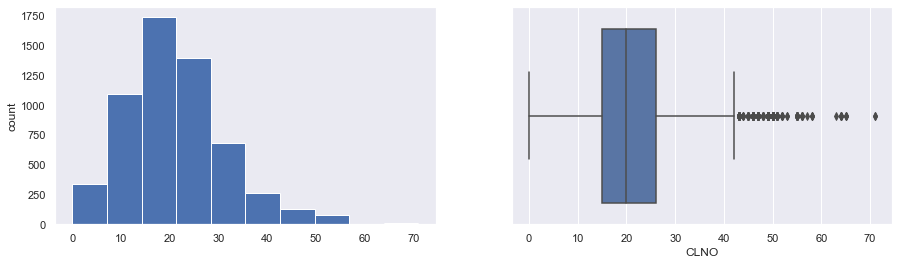

In [196]:
for col in ['LOAN',	'MORTDUE',	'VALUE', 'YOJ',	'DEROG',	'DELINQ',	'CLAGE','NINQ',	'CLNO'	]:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1,2,1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()
    
    
#Checking the distribution and outliers for numerical columns in the data

Checking the distribution and outliers for numerical columns in the data

### **Bivariate Analysis**

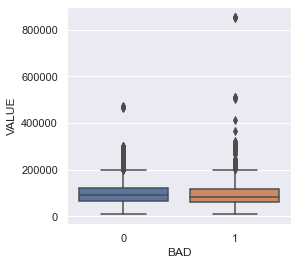

In [206]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data = data , x=  "BAD" , y = "VALUE" )
plt.show()
# outlier observed

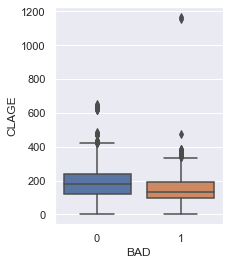

In [207]:
sns.boxplot(data = data , x=  "BAD" , y = "CLAGE" )
plt.show()
# outlier

<AxesSubplot:xlabel='BAD', ylabel='YOJ'>

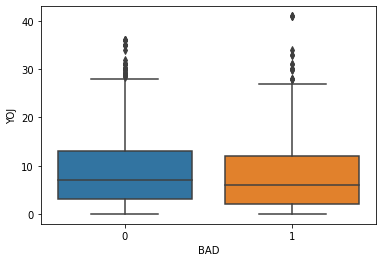

In [19]:
sns.boxplot(data = data , x=  "BAD" , y = "YOJ" )


<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

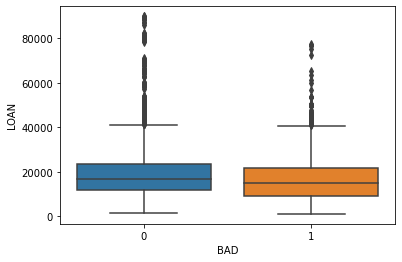

In [20]:
sns.boxplot(data["BAD"],data['LOAN'])

<AxesSubplot:xlabel='BAD', ylabel='NINQ'>

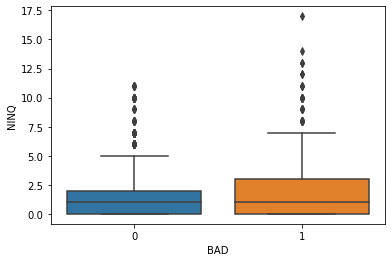

In [21]:
sns.boxplot(data = data , x=  "BAD" , y = "NINQ" )


<AxesSubplot:xlabel='BAD', ylabel='MORTDUE'>

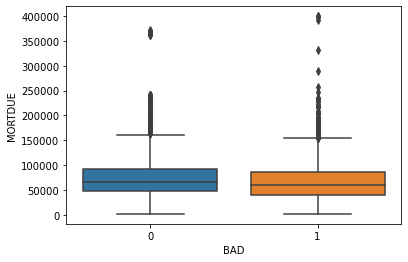

In [22]:
sns.boxplot(data["BAD"],data['MORTDUE'])

<AxesSubplot:xlabel='BAD', ylabel='DEROG'>

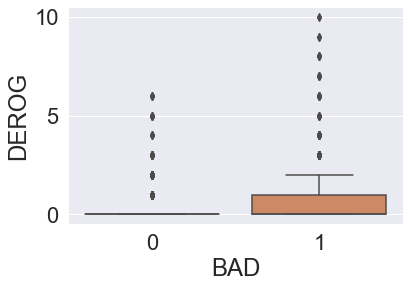

In [152]:
sns.boxplot(data["BAD"],data['DEROG'])

<AxesSubplot:xlabel='BAD', ylabel='DELINQ'>

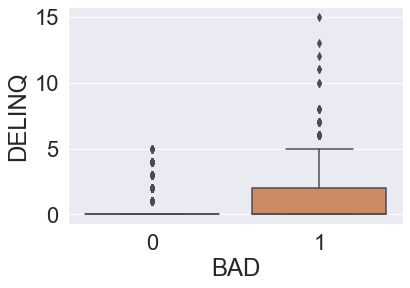

In [153]:
sns.boxplot(data["BAD"],data['DELINQ'])

<AxesSubplot:xlabel='REASON', ylabel='count'>

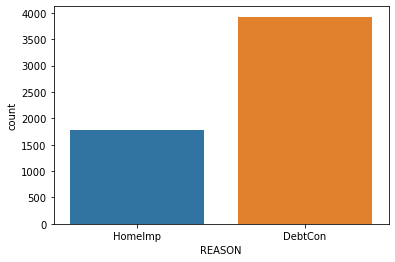

In [23]:
sns.countplot(data['REASON'])

<AxesSubplot:xlabel='REASON', ylabel='count'>

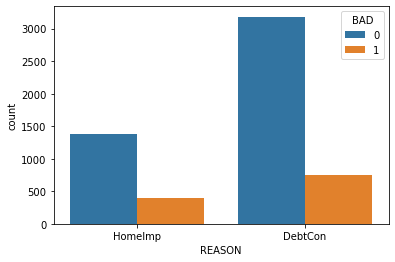

In [24]:
sns.countplot(data['REASON'], hue = data["BAD"] )

<AxesSubplot:xlabel='JOB', ylabel='count'>

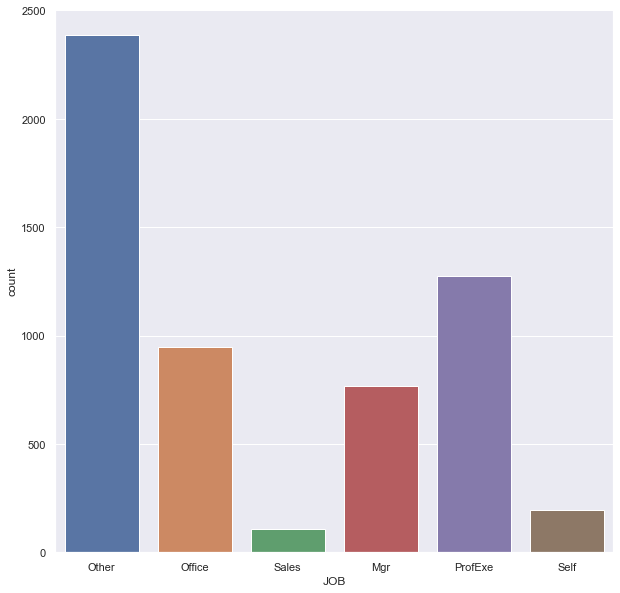

In [201]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.countplot(data['JOB'])

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.countplot(data['JOB'], hue = data["BAD"] )

NameError: name 'plt' is not defined

<AxesSubplot:xlabel='LOAN', ylabel='Density'>

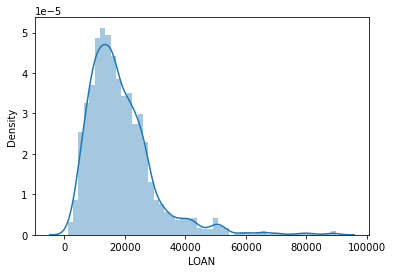

In [28]:
sns.distplot(data['LOAN'])

In [ ]:
ax = sns.countplot(data["DELINQ"])


<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

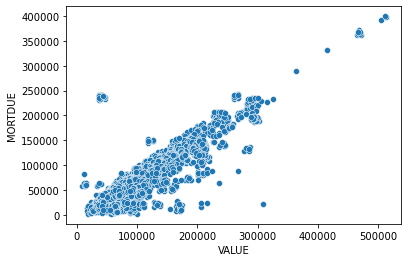

In [29]:
sns.scatterplot(data["VALUE"],data['MORTDUE'])

### **Multivariate Analysis**

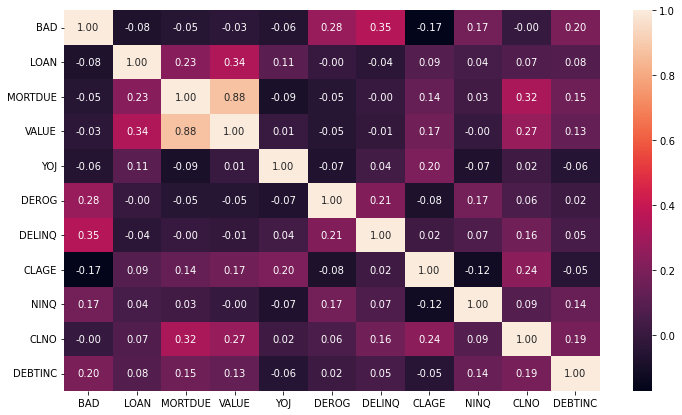

In [30]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = ".2f")

plt.show()

PLOTS for PRESENTATIION

In [4]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                       # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

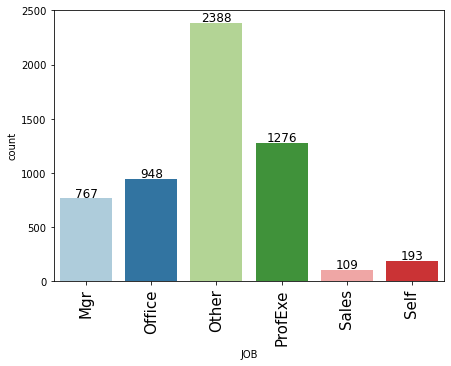

In [6]:
labeled_barplot(data, 'JOB')


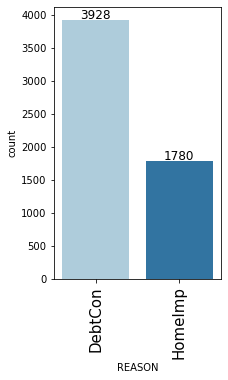

In [8]:
labeled_barplot(data, 'REASON')

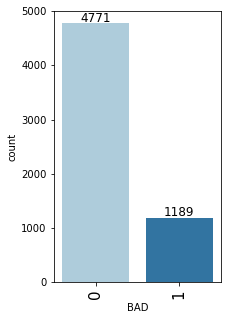

In [10]:
labeled_barplot(data, 'BAD')

**ANSWERS TO Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?


Based on the describe function Loan minimum is 1100 and loan max is 89900.0 and the range is 88800

2. How does the distribution of years at present job "YOJ" vary across the dataset?

The distribution of YOJ is right-skewed implies the majority of customers who purchase home loans are people in thier 20s and 30s ( between 0 - 20) years of experince and this is probably their first home loan.  

3. How many unique categories are there in the REASON variable?
There are three - Nan, Home Improvement and Debt Consolidation

4. What is the most common category in the JOB variable?

The most common category is Other (0.420349 % ) of the data followed by ProfExe  (0.224608 %). 

5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
The main reason for defaulting is Debt Consolidation, combining some or all of your debts into one new account with a single monthly payment. 

6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?

No The loan amounts between borrowers who default and repay are relatively the same based on the median values

7. Is there a correlation between the value of the property and the loan default rate?
No The value amounts between borrowers who default and repay are relatively the same based on the median values

8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

No The mortgage amounts between borrowers who default and repay are relatively the same based on the median values


## Treating Outliers

In [3]:
def detect_outliers(data, col, thresh):
    #data = dataset
    #col = column name
    #threshold = outlier threshold
    
    data[col]
    # Calculating the 25th quantile
    Q1 = data[col].quantile(0.25)

    # Calculating the 75th quantile
    Q3 = data[col].quantile(0.75)

    # Calculating IQR
    IQR = Q3 - Q1

    # Calculating value of upper whisker
    Upper_Whisker = Q3 + 1.5 * IQR

    print("Upper_Whisker:" , Upper_Whisker)
        
        
    # all outliers that are above a threshold value gets assigned Upper_Whisker value 
    data.loc[data[col] >= thresh, col] = Upper_Whisker
    sns.boxplot(x = data[col])



Upper_Whisker: 200447.375


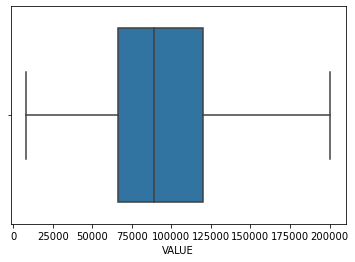

In [4]:
detect_outliers(data,"VALUE", 200000 )


Upper_Whisker: 406.23064200499994


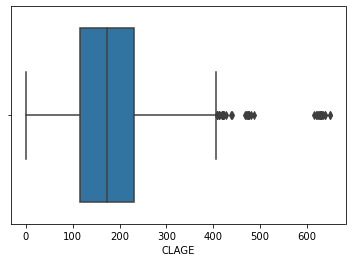

In [5]:
detect_outliers(data,"CLAGE", 800 )


## Treating Missing Values

In [6]:
# check for percentage of missing values in the data


for col in ['LOAN',	'MORTDUE','VALUE', 'YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO']:
   
    k = data[col].isna().sum()
    print(col)
    print((k/5960)*100)
    print(" ")



LOAN
0.0
 
MORTDUE
8.691275167785236
 
VALUE
1.8791946308724832
 
YOJ
8.640939597315436
 
DEROG
11.879194630872483
 
DELINQ
9.731543624161073
 
CLAGE
5.167785234899329
 
NINQ
8.557046979865772
 
CLNO
3.724832214765101
 


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
# We know that `DEBTINC` is missing over 20% of its data, dropping these columns as they will not add value to the modeling
data.drop(['DEBTINC'], axis=1, inplace=True)

In [9]:
#check for duplicate values in the data
data.duplicated().sum()

1

In [10]:
data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
5955    False
5956    False
5957    False
5958    False
5959    False
Length: 5960, dtype: bool

In [11]:
data.isna().value_counts()


BAD    LOAN   MORTDUE  VALUE  REASON  JOB    YOJ    DEROG  DELINQ  CLAGE  NINQ   CLNO 
False  False  False    False  False   False  False  False  False   False  False  False    4247
                                             True   False  False   False  False  False     220
              True     False  False   False  False  False  False   False  False  False     218
              False    False  False   False  False  True   False   False  False  False     152
                                                           True    False  False  False     105
                                                                                          ... 
                              True    False  True   False  False   False  False  False       1
              True     True   False   False  False  True   False   False  True   False       1
              False    True   False   False  False  True   True    False  False  False       1
              True     True   True    False  False  False 

In [12]:
data.isna().sum()


BAD          0
LOAN         0
MORTDUE    518
VALUE      112
REASON     252
JOB        279
YOJ        515
DEROG      708
DELINQ     580
CLAGE      308
NINQ       510
CLNO       222
dtype: int64

In [13]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 558.9+ KB


In [15]:
imputer_mode = SimpleImputer(strategy="most_frequent")
data[["REASON","JOB"]] = imputer_mode.fit_transform(
    data[["REASON","JOB"]])



In [16]:
imputer_mode

SimpleImputer(strategy='most_frequent')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 558.9+ KB


In [18]:
 #"MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO"

In [19]:
imputer_median = SimpleImputer(strategy="median")
data[[  "MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO"]] = imputer_mode.fit_transform(
    data[[  "MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO"]])


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 558.9+ KB


Replaced missing values for "LOAN", "MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO" with median

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [21]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,1,1100,25860.0,39025.000,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0
1,1,1300,70053.0,68400.000,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0
2,1,1500,13500.0,16700.000,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0
3,1,1500,42000.0,200447.375,DebtCon,Other,0.0,0.0,0.0,102.500000,0.0,16.0
4,0,1700,97800.0,112000.000,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0


In [22]:
data = pd.get_dummies(data = data,
                      columns = data.select_dtypes(include = ["object"]).columns.tolist(),
                      drop_first = True)


In [23]:
data

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.000,10.5,0.0,0.0,94.366667,1.0,9.0,1,0,1,0,0,0
1,1,1300,70053.0,68400.000,7.0,0.0,2.0,121.833333,0.0,14.0,1,0,1,0,0,0
2,1,1500,13500.0,16700.000,4.0,0.0,0.0,149.466667,1.0,10.0,1,0,1,0,0,0
3,1,1500,42000.0,200447.375,0.0,0.0,0.0,102.500000,0.0,16.0,0,0,1,0,0,0
4,0,1700,97800.0,112000.000,3.0,0.0,0.0,93.333333,0.0,14.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.000,16.0,0.0,0.0,221.808718,0.0,16.0,0,0,1,0,0,0
5956,0,89000,54576.0,92937.000,16.0,0.0,0.0,208.692070,0.0,15.0,0,0,1,0,0,0
5957,0,89200,54045.0,92924.000,15.0,0.0,0.0,212.279697,0.0,15.0,0,0,1,0,0,0
5958,0,89800,50370.0,91861.000,14.0,0.0,0.0,213.892709,0.0,16.0,0,0,1,0,0,0


In [24]:
# Separating the target variable and other variables
X = data.drop(columns = 'BAD')
Y = data['BAD']

In [25]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [26]:
x_train.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
1355,10600,66590.0,77465.0,1.0,1.0,0.0,110.771623,0.0,6.0,1,0,1,0,0,0
2520,15000,93226.0,108149.0,11.0,0.0,1.0,152.797691,1.0,17.0,0,0,0,0,1,0
3710,19500,100446.0,121516.0,0.0,0.0,0.0,306.111104,1.0,20.0,1,0,0,0,0,0
1854,12400,36034.0,62953.0,9.0,0.0,0.0,262.079345,0.0,16.0,0,0,0,1,0,0
2362,14300,85631.0,100000.0,20.0,0.0,0.0,144.999297,3.0,23.0,1,0,1,0,0,0


In [56]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Default', 'Default'], yticklabels = ['Not Default', 'Default'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [28]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

### **Build a Logistic Regression Model** 

In [29]:
lr = LogisticRegression( class_weight =  {0: 0.19, 1: 0.82},penalty = 'l2',  solver = 'liblinear', max_iter = 100)

lr.fit(x_train, y_train)


LogisticRegression(class_weight={0: 0.19, 1: 0.82}, solver='liblinear')

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      3355
           1       0.45      0.67      0.54       817

    accuracy                           0.78      4172
   macro avg       0.68      0.73      0.69      4172
weighted avg       0.82      0.78      0.79      4172



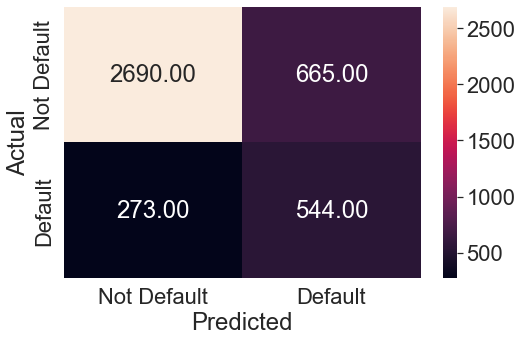

In [57]:
y_pred_train1 = lr.predict(x_train)
metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1416
           1       0.48      0.70      0.57       372

    accuracy                           0.78      1788
   macro avg       0.70      0.75      0.71      1788
weighted avg       0.82      0.78      0.79      1788



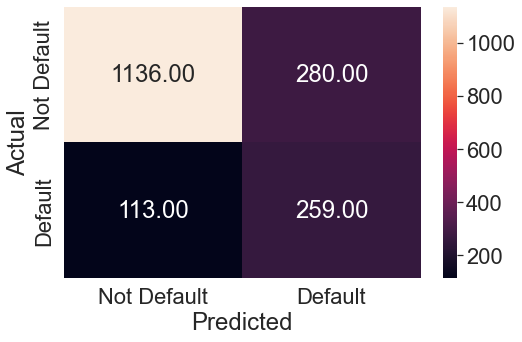

In [58]:
y_pred_train1 = lr.predict(x_test)
metrics_score(y_test, y_pred_train1)

### Decision Tree

Build model using the DecisionTreeClassifier function.
If the frequency of class A is 80% (Bad = 0) and the frequency of class B is 19%, then class A will become the dominant class and the decision tree will become biased toward the dominant class

In [32]:
# Building decision tree model
d_tree = DecisionTreeClassifier( class_weight =  {0: 0.18, 1: 0.82}, random_state = 1)

In [33]:
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.82}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



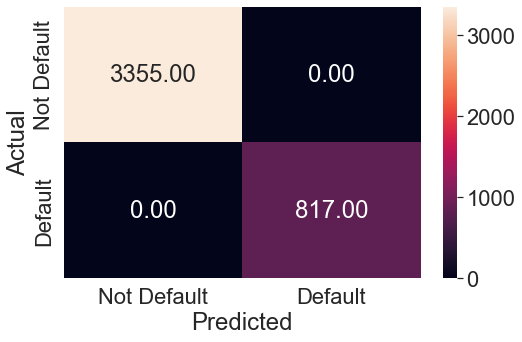

In [59]:
y_pred_train1 = d_tree.predict(x_train)
d_tree.fit(x_train, y_train)

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1416
           1       0.73      0.68      0.71       372

    accuracy                           0.88      1788
   macro avg       0.83      0.81      0.82      1788
weighted avg       0.88      0.88      0.88      1788



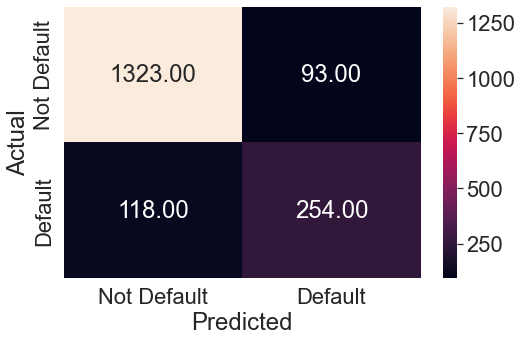

In [60]:
y_pred_test1 = d_tree.predict(x_test)


metrics_score(y_test, y_pred_test1)

In [36]:
dtree_test = model_performance_classification(d_tree,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.82505,0.808559,0.881991


### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [ ]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight =  {0: 0.19, 1: 0.80})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [ 5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 10)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.94      0.41      0.57      3355
           1       0.27      0.89      0.41       817

    accuracy                           0.51      4172
   macro avg       0.60      0.65      0.49      4172
weighted avg       0.81      0.51      0.54      4172



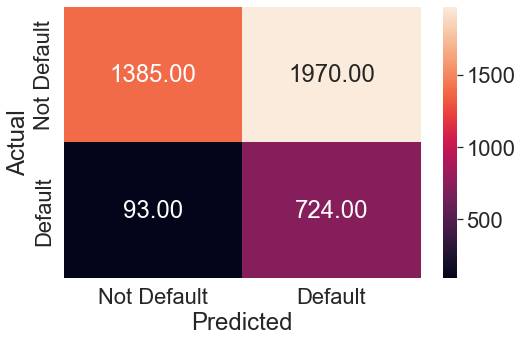

In [61]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(x_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.94      0.42      0.58      1416
           1       0.29      0.89      0.43       372

    accuracy                           0.52      1788
   macro avg       0.61      0.66      0.51      1788
weighted avg       0.80      0.52      0.55      1788



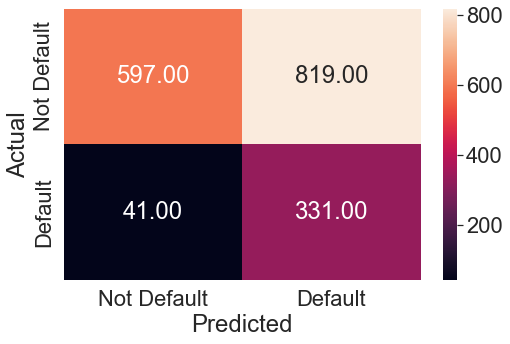

In [62]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(x_test)

metrics_score(y_test, y_pred_test2)

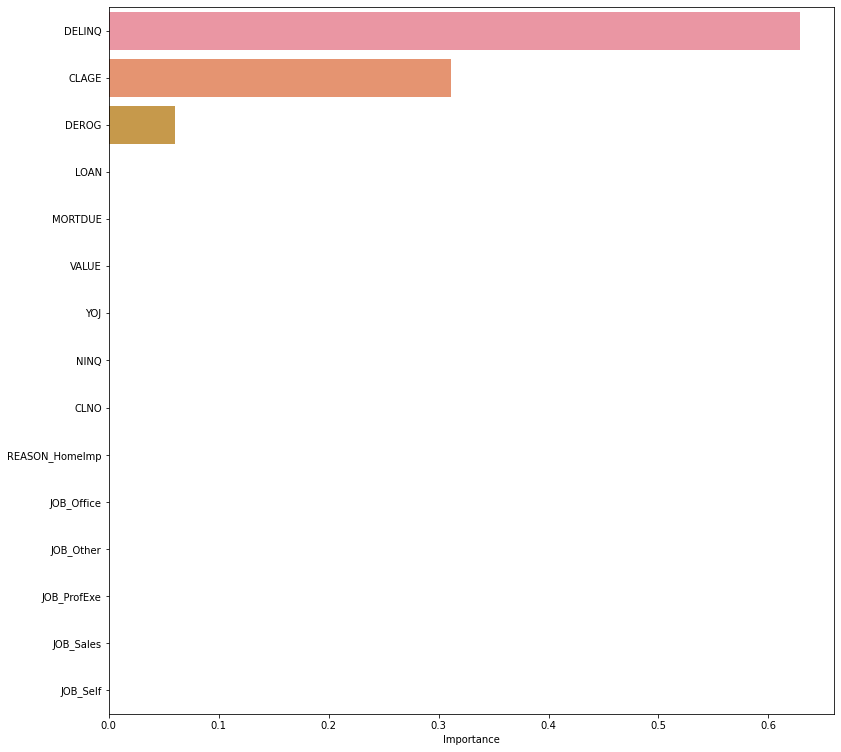

In [40]:
# Plot the feature importance

importances = d_tree_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

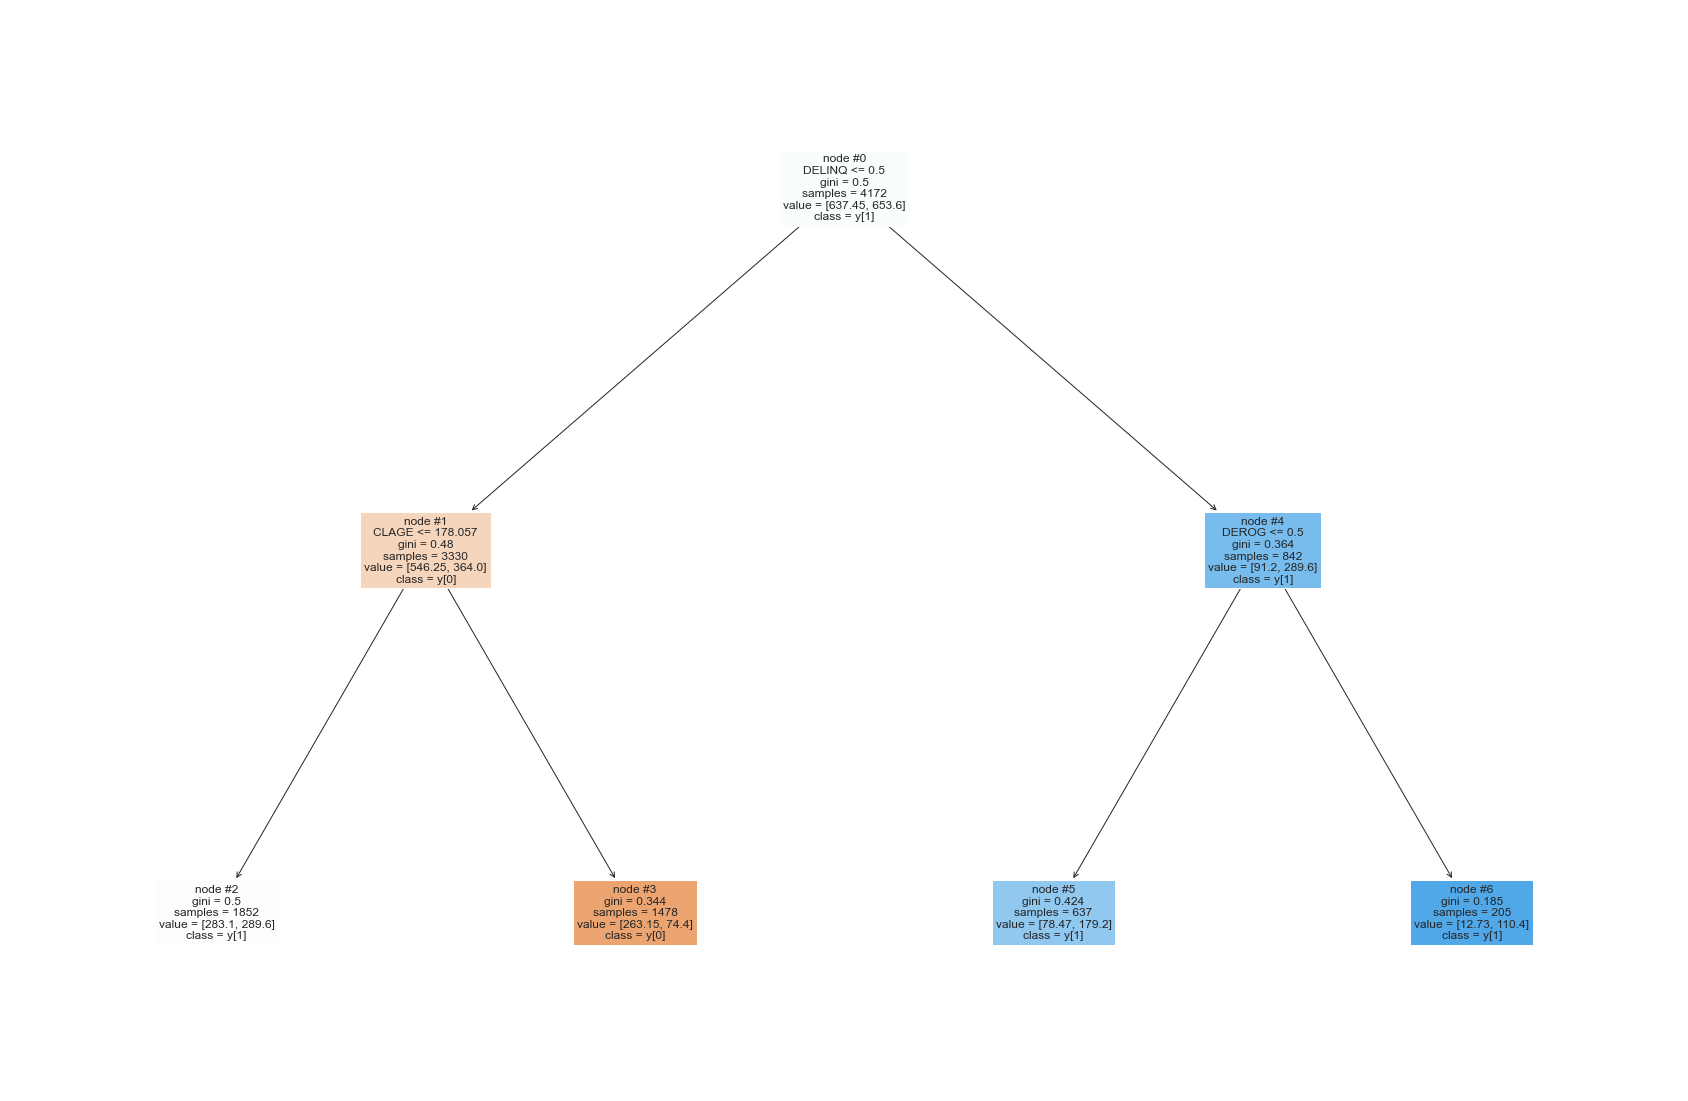

In [151]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(d_tree_tuned, max_depth = 9, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

 After tuning the model we are getting that only 3 features are important. It seems like **the model is having high bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables

In [42]:
dtree_tuned_test = model_performance_classification(d_tree_tuned,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.611781,0.655698,0.519016


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [43]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight= {0: 0.17, 1: 0.83}, random_state=7)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



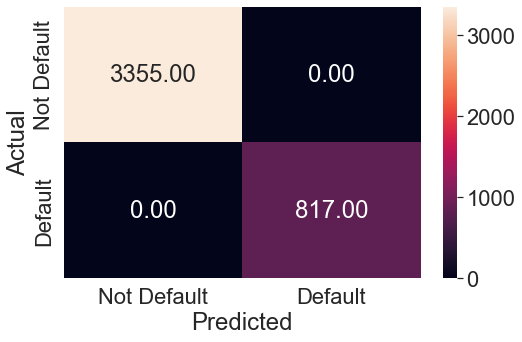

In [63]:
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1416
           1       0.99      0.58      0.73       372

    accuracy                           0.91      1788
   macro avg       0.94      0.79      0.84      1788
weighted avg       0.92      0.91      0.90      1788



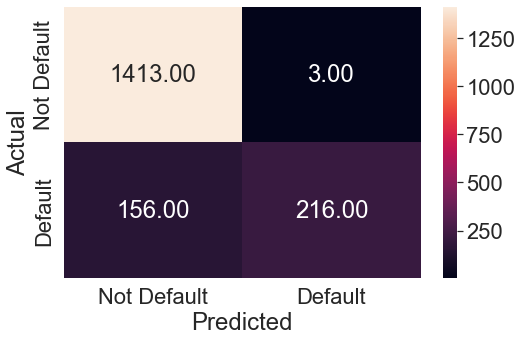

In [64]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

<AxesSubplot:xlabel='Importance'>

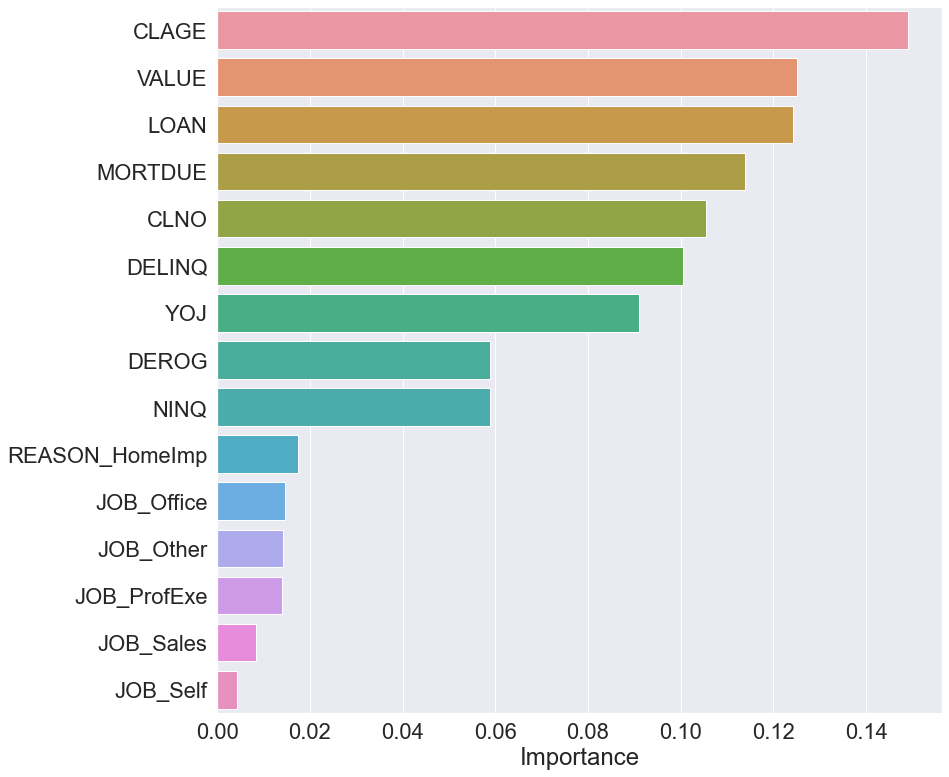

In [65]:
# Plotting feature importance
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

In [47]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.943437,0.789263,0.911074


### **Random Forest Classifier Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.19, 1: 0.81},  random_state = 7)

# Grid of parameters to choose from
params_rf = {
        'max_depth': np.arange(2, 10),
        "min_samples_leaf": [2, 4, 8, 10, 12, 14],
        "n_estimators": [10, 50, 80, 100, 120],
        "max_features": [0.7, 0.9, 'auto'],
        "max_samples": [0.9, 1]
    
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

In [ ]:
# Checking performance on the test data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

BASED ON TUNING

In [82]:
rf_estimator_tuned2 = RandomForestClassifier(class_weight={0: 0.15, 1: 0.84}, max_depth=8,
                       max_samples=0.9, min_samples_leaf=14, n_estimators=50,
                       random_state=7)


rf_estimator_tuned2.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.84}, max_depth=8,
                       max_samples=0.9, min_samples_leaf=14, n_estimators=50,
                       random_state=7)

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      3355
           1       0.50      0.85      0.63       817

    accuracy                           0.80      4172
   macro avg       0.73      0.82      0.75      4172
weighted avg       0.87      0.80      0.82      4172



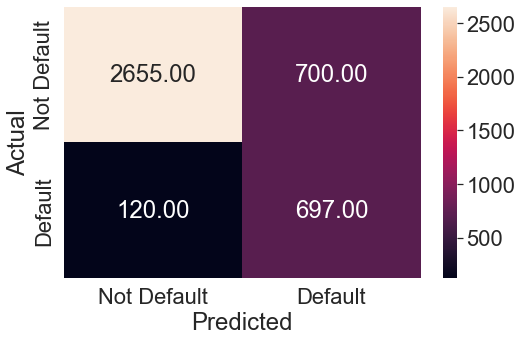

In [83]:
# Checking performance on the test data
y_pred_train_rf_tuned2 = rf_estimator_tuned2.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned2)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1416
           1       0.50      0.81      0.62       372

    accuracy                           0.79      1788
   macro avg       0.72      0.80      0.74      1788
weighted avg       0.85      0.79      0.81      1788



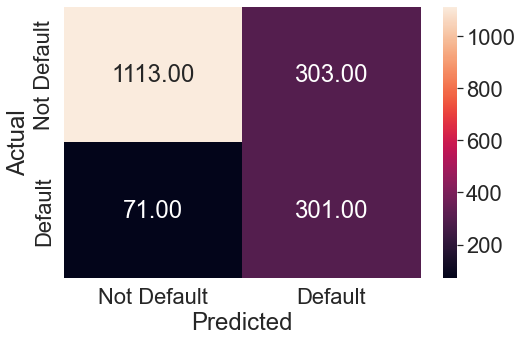

In [84]:
# Checking performance on the test data
y_pred_test_rf_tuned2 = rf_estimator_tuned2.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned2)

In [85]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned2, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.719189,0.797578,0.790828


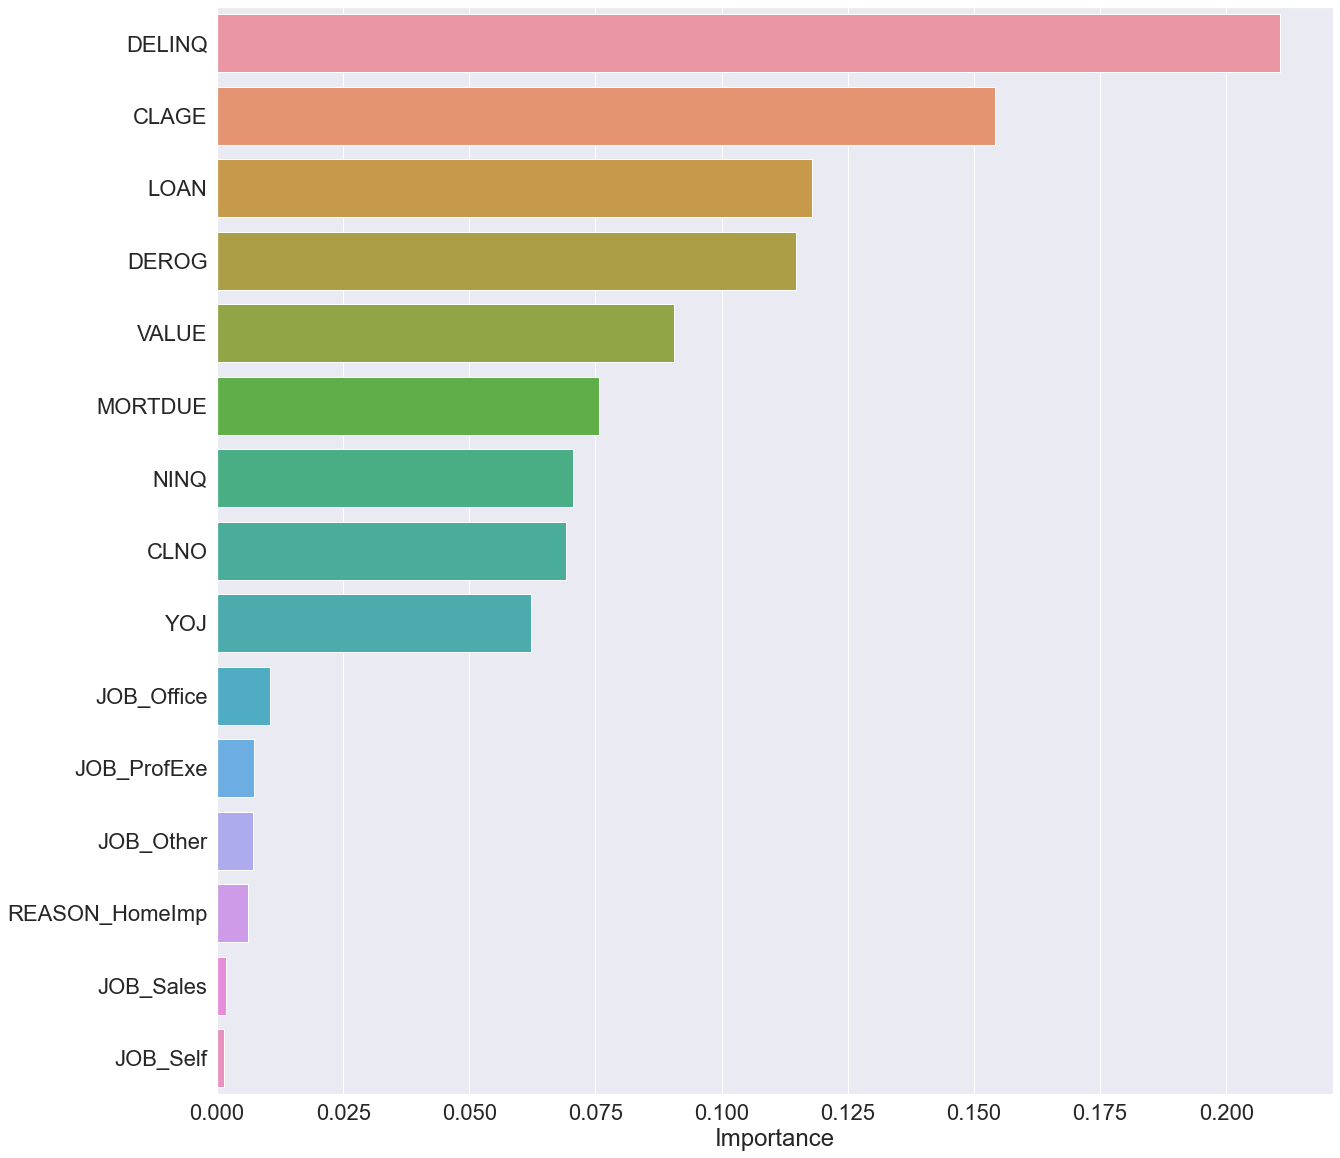

In [144]:
# Plot the feature importance

importances = rf_estimator_tuned2.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (20, 20))
sns.set(font_scale=2)


sns.barplot(x=importance_df.Importance,y=importance_df.index);

In [87]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1 , learning_rate = 0.4)

# Fitting the model
adaboost_model.fit(x_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,x_test,y_test)


adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.806406,0.647234,0.838367


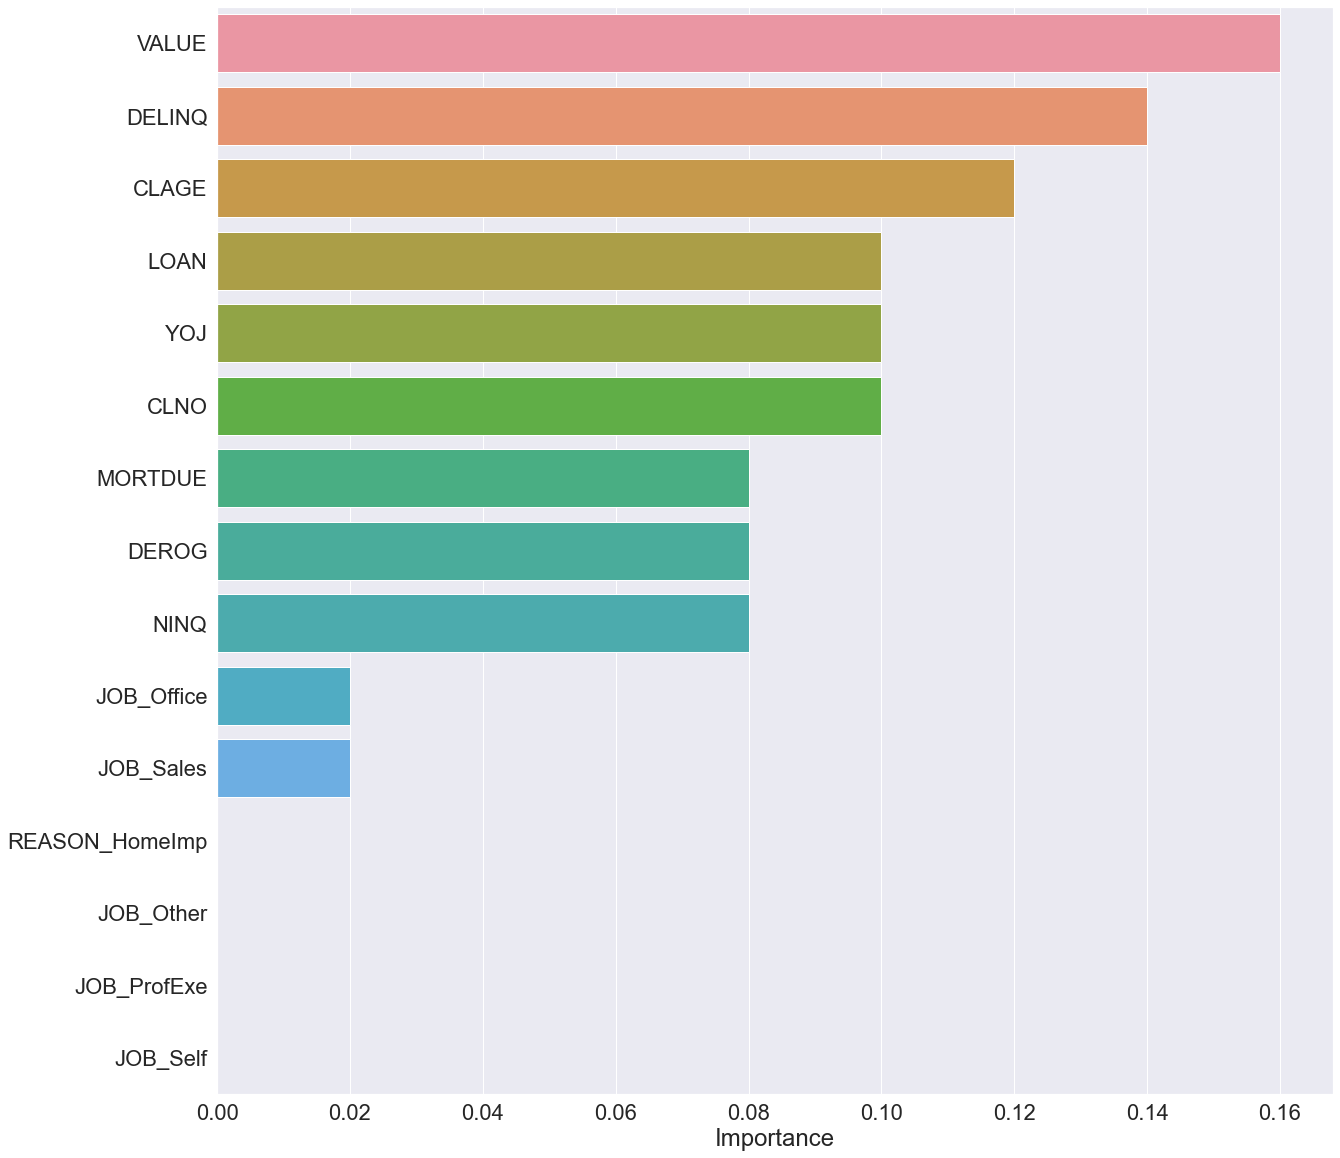

In [143]:
# Plot the feature importance

importances = adaboost_model.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (20, 20))
sns.set(font_scale=2)


sns.barplot(x=importance_df.Importance,y=importance_df.index);

In [88]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1,  max_depth=8, learning_rate = 0.1)

# Fitting the model
gbc.fit(x_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, x_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.928181,0.824995,0.920582


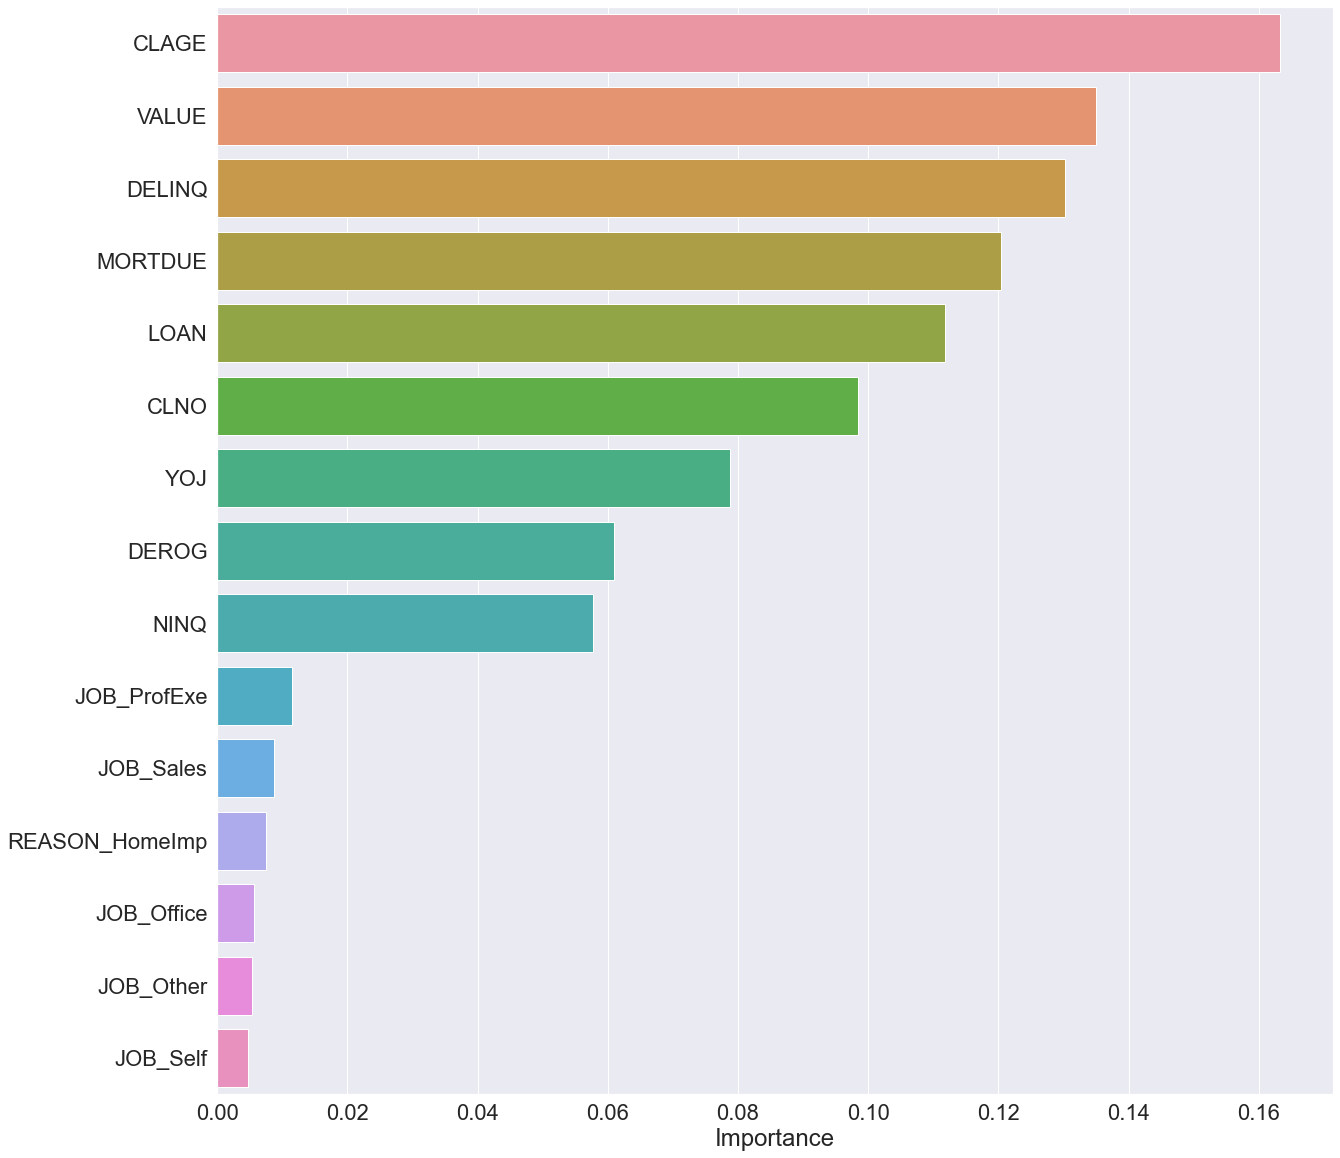

In [142]:
# Plot the feature importance

importances = gbc.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (20, 20))
sns.set(font_scale=2)


sns.barplot(x=importance_df.Importance,y=importance_df.index);

In [79]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss', booster='gbtree', max_depth=8)

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,x_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.946038,0.84494,0.931767


In [157]:
xgb.get_booster().get_score(importance_type='gain')


{'LOAN': 1.6303374767303467,
 'MORTDUE': 1.5809643268585205,
 'VALUE': 1.6409180164337158,
 'YOJ': 1.6018717288970947,
 'DEROG': 4.259790897369385,
 'DELINQ': 6.886259078979492,
 'CLAGE': 1.671181559562683,
 'NINQ': 2.0584094524383545,
 'CLNO': 1.4679034948349,
 'REASON_HomeImp': 1.0919747352600098,
 'JOB_Office': 1.9653469324111938,
 'JOB_Other': 1.1706881523132324,
 'JOB_ProfExe': 1.2918727397918701,
 'JOB_Sales': 1.4856096506118774,
 'JOB_Self': 2.606706142425537}

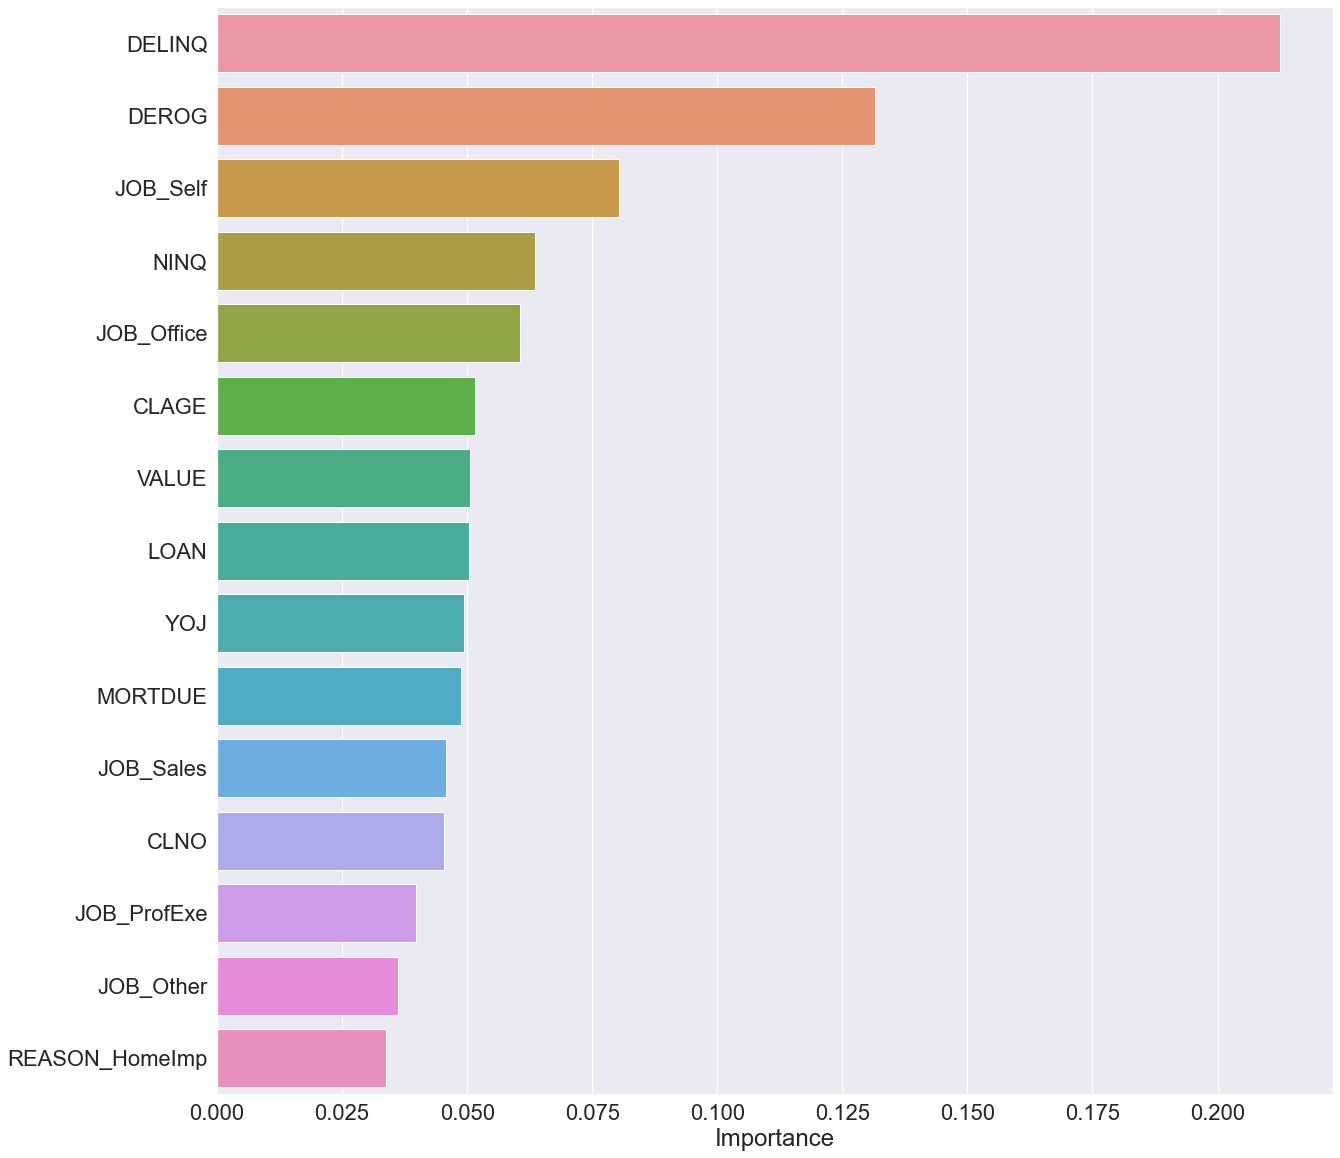

In [53]:
# Plot the feature importance

importances = xgb.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (20, 20))
sns.set(font_scale=2)


sns.barplot(x=importance_df.Importance,y=importance_df.index);

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



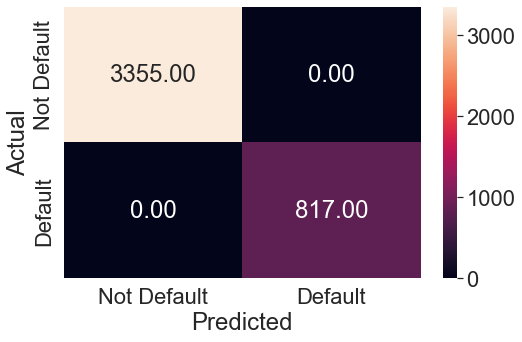

In [159]:
y_pred_train_xgb = xgb.predict(x_train)

metrics_score(y_train, y_pred_train_xgb)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1416
           1       0.97      0.70      0.81       372

    accuracy                           0.93      1788
   macro avg       0.95      0.84      0.88      1788
weighted avg       0.93      0.93      0.93      1788



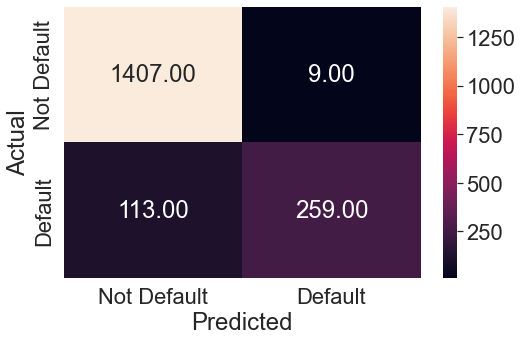

In [160]:
y_pred_test_xgb = xgb.predict(x_test)

metrics_score(y_test, y_pred_test_xgb)

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?


 

In [102]:

dtree_test.T



,0
Precision,0.825050
Recall,0.808559
Accuracy,0.881991


In [74]:
dtree_tuned_test.T

,0
Precision,0.611781
Recall,0.655698
Accuracy,0.519016


In [75]:
rf_estimator_test.T

,0
Precision,0.943437
Recall,0.789263
Accuracy,0.911074


In [86]:
rf_estimator_tuned_test.T

,0
Precision,0.719189
Recall,0.797578
Accuracy,0.790828


In [141]:
adaboost_model_perf_test.T

,0
Precision,0.806406
Recall,0.647234
Accuracy,0.838367


In [89]:
gbc_perf_test.T

,0
Precision,0.928181
Recall,0.824995
Accuracy,0.920582


In [81]:
 xgb_perf_test.T

,0
Precision,0.946038
Recall,0.844940
Accuracy,0.931767


In [138]:
classificationModels = [
     "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned", 
    "Ada Boost",
    "Gradient Boosting ",
    "XG Boost "]

In [179]:
models_test_comp_df['Classification_models']= classificationModels

In [180]:
print("Table 1: Classification Model Test Performance Comparison")

models_test_comp_df

Table 1: Classification Model Test Performance Comparison


,Precision,Recall,Accuracy,Classification_models
0,0.825050,0.808559,0.881991,Decision Tree
0,0.611781,0.655698,0.519016,Decision Tree Tuned
0,0.943437,0.789263,0.911074,Random Forest
0,0.719189,0.797578,0.790828,Random Forest Tuned
0,0.806406,0.647234,0.838367,Ada Boost
0,0.928181,0.824995,0.920582,Gradient Boosting
0,0.946038,0.844940,0.931767,XG Boost


It is clear that the recall rate improves with XGBoost Classifier, and one can see how the model has evolved through each of the algorithms 

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

It is clear that some of the most important features are CLAGE, VALUE, MORTDUE and LOAN. Before borrowers are accepted by the banks, these features should be considered. 

CLAGE - the age of the oldest credit line (this gives insight regarding how the borrower historically handles credits)

VALUE - Current value of loan plays a large role in determining defaults. If a borrower has larger loans, it can be stated that they will have difficulty keeping up with payments. In addition, if they have any financial emergencies or family circumstances, these would also affect defaults.

MORTDUE -  Current amount due on existing mortgage will affect repay since in several metropolitan cities, the prices of property and real estate have been increasing rapidly. 

LOAN - The amount of loan approved is another main factor since current approvals shows a borrower's current capability.

Some key recommendations from the models are to focus on the feature of importance.
The two main stakeholders in this problem are bankers (loaners) and borrowers. When a loan is declined,the bankers can pin point these features to explain why they were rejected. 

Similarly, if the banking officials create an online self-assesment, borrowers can also understand which factors determine whether loans are approved so they can work towards improving/cleaning their credit scores.

The main risk of this solution is that sometimes if there are external financial highs, and people are able to recover financially, they would have still been 'rejected for loans' based on the alogorithm, but they would have made good repayers, and this could mean they will get loans at competiting financial institutions, thus this one would lose a client.



**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?


It is clear that the XGBoost Classifier is the best option for this problem. After some hyperparamter tuning, it can be seen that Precision	and Recall are 0.95% and 0.84% respectively, indicating this model can sucessfully detect defaulting. 

This algorithm is unique as it can do gradient boosting, it supports L1 and L2 regularisation which helps in preventing overfitting as well as pruning.This model is known to be stable even with sparse data and for its high performance.


There is scope to improve further by looking into more hyperparamters of the Boosting classifiers. 


## IMPROVEMENTS BASED ON MILESTONE SUBMISSION FEEDBACK 


1. Mention/identify the the tradeoff between model performance and model interpretability 

XGBoost is an ensemble learning method and applies parallelized gradient boosting which is computationally time effective. It can combine many week models to minimize errors. The main tradeoff is model intrepretability. In a single decision tree, it is easy to see the various hyperparamters and tune them, however for the XG boost, hyper parameters like log loss used to optimize the overall process, so the interpretability decreases, and the model becomes a black box.

2.  Is the model performance good enough for deployment in production and is it interpretable?

I would say that the model is not ready to be deployed in production. As a Data Scientist, I would like to internally test the XG Boost model further using data it has not seen before. This dataset only has 5960 rows and 12 columns, of which only approx. 19% is default data and it can be concluded that this is quite small. The models involved adding class weights to the default data to get the predictions. So, additional data is needed before production. I would say that the model is fairly intrepretable when looking at the important features. 

If a person has Delinquent Credit lines or they have major Deroatory reports, that should be  a clear indicator that the borrower will likely default. 

3. Decide whether the model is good enough to be deployed in production based on the model metrics

Earlier in this notebook, the recall rate was justified to be the most important metric. Based on Table 1: Classification Model Test Performance Comparison above, it can be seen that it acheived the best recall rate of all models of 84%, showcasing that that the model will identify defaulters. In addition, The precision rate of 94% shows that the model has a low number of false positives, meaning the model will make correct predictions. Lastly, the accuracy is 93%, the best acheived value out of all models, and this shows that model accurately classifies defaulters. However, one issue with using accuracy as a metric is the need for a balanced data set. In this case, the data set only has approx. 19% defaulters as mentioned above. This has been adjusted with class weights. Please note, for the XG boost model, I tried to tune theg the 'scale_pos_weights' parameter as 'class_weights", however there was marginal improvement to the model. 

The model_performance_classification in the code uses Macro accuracies. Macro-averaging gives equal weight to each class, while micro-averaging gives equal weight to each instance.

4. What model do you propose to be adopted and why is this the best solution to adopt?

The XG boost model is the model I propose, this is beacause it captures the key features while providing a good recall and precision rate. Moreover, it gives some importance to all the features unlike the other models which favor only some features.

6. How that solves the problem?

This model solves the problem because when a new borrower approaches the bank with their credit history and score, the model is able to give some weight to all the different features in their profile to classify whether they will default. This model will facilitate profit for the bank.

## Problem and solution summary

### What problem was being solved? Provide the summary of the problem.


Retail banks lend home loans and the interest they earn is a significant portion of their profit and income, so selecting and approving the loan is a judicious process that is time-consuming and requires detailed analysis of credit score and other financial details and there is a human-bias component. By relying on advancements in AI, it is possible to create a model to predict between default and non-default borrowers using classification.

The intended goal is to effectively detect defaulters (based on existing credit history) to increase profits for the bank (or avoid losses). Using the provided dataset with existing customers, one can extract features that would be beneficial to determine whether a new customer will default on the loan. 
The  predictive model must be explainable so that justifications can be provided in case of future disputes.


### State the reasons for the proposed solution design? What are the key points that decribe the final proposed solution design?

The proposed solution design is to implement an XGBoost (Extreme Gradient Boosting) Classification model for this loan default prediction project. The reason this model is very effective while compared with other models from this notebook are:

- After some hyperparameter tuning, it can be seen that Precision and Recall are 0.95% and 0.84% respectively, indicating this model can sucessfully detect defaulting. In addition, the accuracy is 93%, this model clearly outperfomed other models tuned.

There are some distinct advantages to XG boost that make it a great choice:
- It supports L1 and L2 regularisation which helps in preventing overfitting as well as pruning.
- This model is known to be stable even with sparse data and for its high performance
- Trees are built in parallel (rather than sequentially) which is computationally efficient 


### How it would affect the problem/business? Why is this a 'valid' solution that is likely to solve the problem? How would it affect problem/business
This would help the bank's consumer credit department in several ways. This is a valid solution for the following reasons:
1. This would remove the biases from the human approval process
2. This model is intrepretable through the feature importance so bankers can tell clients the reason why their requests for lines of credit were not accepted. In other words, bankers can have concrete explanations for adverse behaviours
3. If any existing clients are about the default, their existing profiles can be run on the model to predict defaulting

Implementing this model will improve the business in the following ways: 

1. This model is computationally efficient so there are no processing bottlenecks
2. Bankers can save time and do not have to manually analyze the credit history of the client
3. For the management of the bank, even if 'experienced' bankers who analyze credit scores leave the company, there will still be a reliable mechanism.



## Recommendations for implementation

 What are some key recommendations to implement the solution? What are the key actionables for stakeholders?
 
 - It was seen that the two most important features that led to defaulting are Delinquent Credit Lines (DELINQ) and Derogatory reports that indicate late payments (DEROG). It should be seen that the bankers do not issue lines of credit to induviduals under such cases, rather they should educate them about improving their credit score.  
 
- It is also seen that most people tend to use this for debt consolidation so the bank could take the time to better understand other commitments of the people interested in the line of credit and their ability to pay back.

- Features such as number of recent credit inquires (NINQ) and age of the oldest credit in months (CLAGE) also appear to be in the list of features, so when loans are given to induviduals, these factors must also be taken into consideration.

  
 What is the expected benefit and/or costs ( State some rational assumptions to put forward some numbers on costs/benefits for stakeholders)?  What are the potential risks or challenges of the proposed solution design? 

 Some of the benefits of this solution are:
1.  Due to its computational efficiency, the XG Boost model can reduce delays and bottlenecks which may occur in the process of loan approvals. Since processing delays can cause more frustration in staff and clients, this solution will improve the overall work-flow of the loan approval process 

2. Previosuly Bankers manually analyze the credit history of the client, and it can include several levels of staff to approve based on the details of the portfolio. Now with the help of the model, the staff can do an overview check rather than a detailed analysis.

3. As the bank gets more clients and the model is 'exposed' to more data, it will become more robust. In addition, additional features can be analyzed in the future 

4. Bank profits retained. The main goal of this project was to avoid losses and through this model, the bank can ensure that it is a profitable business. Oftentimes, financial institutions play a vital role in the success of economies as they are linked with several businesses. By being profitable, they can provide other line of credit products and expand their business. 

Some of the costs of the business are: 

Some of the costs are:

1. Data pipelining. Since this is highly sensitive financial data, there needs to be an efficient storage system (whether it is on premise or the cloud). Usually storage comes with a cost depending on the size of the data and the needs of banks. There has to be an efficient way to retrieve and store data

2. The framework for code deployment and monitoring. The banks need to hire Data Scientists and Software Engineers so that this code base can be maintained.There may be some infrastructure bottlenecks during deployment or maintenance
 
3. Scaling the model. Overtime, due to the needs of the organization the framework and the model will have be scaled to suit future need.

4. Security. Since this data is highly classified, additional measures need to be put in to ensure safety

5. Since bankers are usually 'non-techincal' it would be difficult to explain why these features shown by the model are best indicators compared to status-quo techniques.


 What further analysis needs to be done or what other associated problems need to be solved?
 
 
1. As of the dataset provided, there are several missing values in the dataset which have been 'handled'. This dataset is incomplete and additional data should be used to test the model before it can be sent to production. In addition, a larger dataset to test is recommended.

2. I personally feel that there are additional factors of an induvidual that this dataset failed to capture. For example, the job roles are very vague, having additional information such as industries where people are managers/execs. That way when one industry is affected, it is easy to pinpoint which induviduals fall under than category. 

3. Another concern I have related to the imbalance of the dataset, approximately 20% is 'default' and this has been adjusted for in the modelling of the Random Forests with class weights. Since this is a very important financial profit matter, re-running the model on a more balanced dataset would be beneficial.

4. Using a pipeline with a Column Transformer is a common practice in machine learning. A Column Transformer to preprocess the data and a model that has been trained on the data. It ensure that data preprocessing is consistent and reproducible. The pipeline will take care of data preprocessing and model training in a single step, making it easy to use the model in other applications.
